**UNIAXIAL LOADING**

In [1]:
import numpy as np

In [2]:
a1 = np.linspace(0.8,1.5,20) # Value of the a1 varing from 0.8 to 1.5 total 20 values are considerd
print(a1)

[0.8        0.83684211 0.87368421 0.91052632 0.94736842 0.98421053
 1.02105263 1.05789474 1.09473684 1.13157895 1.16842105 1.20526316
 1.24210526 1.27894737 1.31578947 1.35263158 1.38947368 1.42631579
 1.46315789 1.5       ]


In [3]:
a_2 = (-2*a1*a1 +7)/5 # as a3 = a2 , using this relation the value of a2 is calculated for all the values of a1
a2 = np.sqrt(a_2)
print(a2)

[1.06957936 1.05824294 1.04626496 1.03362311 1.02029272 1.00624642
 0.99145379 0.97588088 0.95948971 0.94223757 0.92407624 0.90495099
 0.8847993  0.86354933 0.84111784 0.81740756 0.7923037  0.76566919
 0.73733818 0.70710678]


In [4]:
# Taking the a1 and a2 value corressponding values of the sigma that is uniaxial stress is calculated
x = a1
y = a2
s = ((-x*y*y)/2)*((1/(x*x))+(2/(y*y)))+((3*x*(x*x+2*y*y)-7*x)/(2*y*y))+((y*y)/(2*x))
print(s)

[-0.17622378 -0.15676558 -0.13222793 -0.10197987 -0.06529229 -0.02131733
  0.0309375   0.09264226  0.16518686  0.25023606  0.34980161  0.46633846
  0.6028748   0.76319053  0.95206693  1.17564278  1.44193396  1.76161147
  2.1492014   2.625     ]


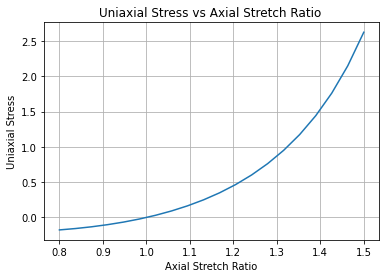

In [5]:
import matplotlib.pyplot as plt

xpoints = a1
ypoints = s

plt.plot(xpoints, ypoints)
plt.xlabel("Axial Stretch Ratio")
plt.ylabel("Uniaxial Stress")
plt.title("Uniaxial Stress vs Axial Stretch Ratio ")
plt.grid()
plt.show()

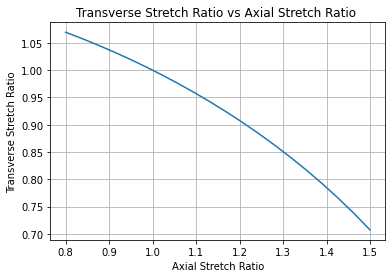

In [6]:
xpoints = a1
ypoints = a2

plt.plot(xpoints, ypoints)
plt.xlabel("Axial Stretch Ratio")
plt.ylabel("Transverse Stretch Ratio")
plt.title("Transverse Stretch Ratio vs Axial Stretch Ratio ")
plt.grid()
plt.show()

**Pure Shear - ST V**

In [7]:
from scipy.optimize import fsolve

In [8]:
w = [-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4]
#w = np.array([-0.4,-0.3])
o =0

In [9]:
p=[]
for k in w:
  #k = w[0]
  def func(i):
    x = i[0]
    y = i[1]
    z = i[2]
    F = np.empty(3)
    F[0] = (-((y**2*(x**2+y**2)+(z**2)*(x**2+k**2))/2*x*y*z)+(((3*(x**2+y**2+z**2+k**2)-7)/(2*x*y*z))*(x**2+k**2))+((y*z)/(2*x)))
    F[1] = (-((y**2*(x**2+z**2)+(z**2)*(y**2+k**2))/2*x*y*z)+(((3*(x**2+y**2+z**2+k**2)-7)/(2*x*y*z))*(y**2))+(((z*(x**2+k**2))/(2*x*y))))
    F[2] = (-((y**2*(x**2+z**2)+(z**2)*(x**2+k**2))/2*x*y*z)+(((3*(x**2+y**2+z**2+k**2)-7)/(2*x*y*z))*(z**2))+((y*x)/(2*z))) #x changed to z 
    return F
  guess = np.array([1,1,1])
  p_n = fsolve(func, guess)
  x = p.append(p_n)
  o += 1

In [10]:
w1 = [ p[0][0], p[1][0],p[2][0],p[3][0],p[4][0],p[5][0],p[6][0],p[7][0],p[8][0]]
print(w1)
w2 = [ p[0][1], p[1][1],p[2][1],p[3][1],p[4][1],p[5][1],p[6][1],p[7][1],p[8][1]]
print(w2)
w3 = [ p[0][2], p[1][2],p[2][2],p[3][2],p[4][2],p[5][2],p[6][2],p[7][2],p[8][2]]
print(w3)

[0.974765862438353, 0.9883593761527579, 0.9965413738212893, 0.9996847253846218, 1.0, 0.9996847253846218, 0.9965413738212893, 0.9883593761527579, 0.974765862438353]
[1.1064806569900916, 1.0671474979954867, 1.0338381466615125, 1.0094923256622201, 1.0, 1.0094923256622201, 1.0338381466615125, 1.0671474979954867, 1.1064806569900916]
[1.0637045602319204, 1.0386574105863209, 1.0184483707846343, 1.0048787239109298, 1.0, 1.0048787239109298, 1.0184483707846343, 1.0386574105863209, 1.0637045602319204]


In [11]:
a1 = w1[0]
a2 = w2[0]
a3 = w3[0]
k = w[0]
s_s = (((3*k*a2*(a1**2+a2**2+a3**2+k**2))-7*k*a2)/(2*a1*a2*a3))-((k*a3)/(2*a1))
print(s_s)

-0.43715299115195816


In [12]:
shear = []
for a1,a2,a3,k in zip(w1,w2,w3,w):
  s_s = (((3*k*a2*(a1**2+a2**2+a3**2+k**2))-7*k*a2)/(2*a1*a2*a3))-((k*a3)/(2*a1))
  shear.append(s_s)

In [13]:
shear

[-0.43715299115195816,
 -0.2593001107932711,
 -0.13599240940857948,
 -0.05499389358088796,
 0.0,
 0.05499389358088796,
 0.13599240940857948,
 0.2593001107932711,
 0.43715299115195816]

In [14]:
theta = []
for a1,a2,k in zip(w1,w2,w):
  angle = np.arccos((k*a1)/(np.sqrt(k**2+a2**2)))
  theta.append(angle)


In [15]:
theta

[1.9085775255345203,
 1.841575386524671,
 1.7612206480656438,
 1.6695026650149425,
 1.5707963267948966,
 1.4720899885748506,
 1.3803720055241495,
 1.3000172670651222,
 1.2330151280552728]

In [16]:
lambada_y = []
for a2,k in zip(w2,w):
  l_y = k**2+a2**2
  lambada_y.append(l_y)

In [17]:
lambada_x = w1
lambada_z = w3

In [18]:
print(lambada_x)
print(lambada_y)
print(lambada_z)

[0.974765862438353, 0.9883593761527579, 0.9965413738212893, 0.9996847253846218, 1.0, 0.9996847253846218, 0.9965413738212893, 0.9883593761527579, 0.974765862438353]
[1.3842994442932248, 1.2288037824780274, 1.1088213134925111, 1.0290747555709179, 1.0, 1.0290747555709179, 1.1088213134925111, 1.2288037824780274, 1.3842994442932248]
[1.0637045602319204, 1.0386574105863209, 1.0184483707846343, 1.0048787239109298, 1.0, 1.0048787239109298, 1.0184483707846343, 1.0386574105863209, 1.0637045602319204]


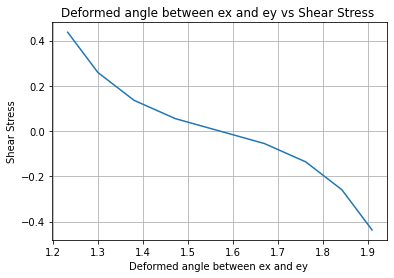

In [19]:
xpoints = theta
ypoints = shear

plt.plot(xpoints, ypoints)
plt.xlabel("Deformed angle between ex and ey ")
plt.ylabel("Shear Stress")
plt.title("Deformed angle between ex and ey vs Shear Stress ")
plt.grid()
plt.show()

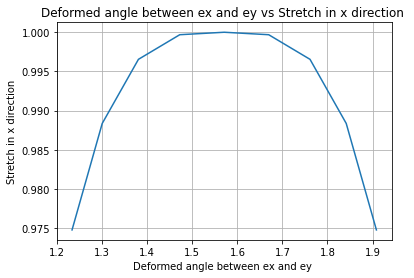

In [20]:
xpoints = theta
ypoints = lambada_x

plt.plot(xpoints, ypoints)
plt.xlabel("Deformed angle between ex and ey ")
plt.ylabel("Stretch in x direction")
plt.grid()
plt.title("Deformed angle between ex and ey vs Stretch in x direction ")
plt.show()

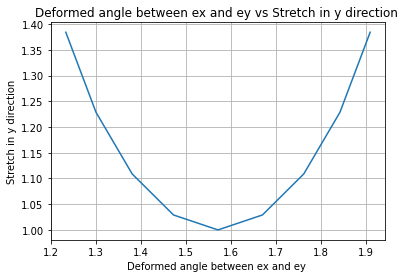

In [21]:
xpoints = theta
ypoints = lambada_y

plt.plot(xpoints, ypoints)
plt.xlabel("Deformed angle between ex and ey ")
plt.ylabel("Stretch in y direction")
plt.title("Deformed angle between ex and ey vs Stretch in y direction ")
plt.grid()
plt.show()

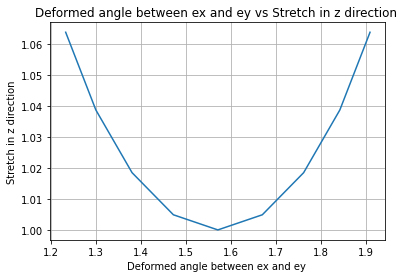

In [22]:
xpoints = theta
ypoints = lambada_z

plt.plot(xpoints, ypoints)
plt.xlabel("Deformed angle between ex and ey ")
plt.ylabel("Stretch in z direction")
plt.title("Deformed angle between ex and ey vs Stretch in z direction ")
plt.grid()
plt.show()

Uniaxial Loading for Incompressible